In [1]:
import thinkstats2

In [2]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [3]:
hist.Freq(2)

2

In [4]:
hist[2]

2

In [5]:
hist.Freq(4)

0

In [6]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [7]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


In [8]:
for val, freq in hist.Items():
    print(val, freq)

1 1
2 2
3 1
5 1


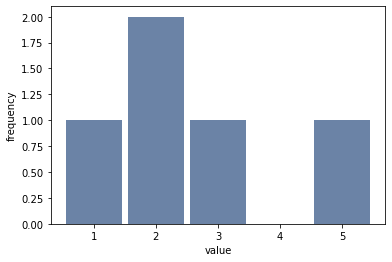

<Figure size 576x432 with 0 Axes>

In [9]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.show(xlabel='value', ylabel='frequency')

In [10]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

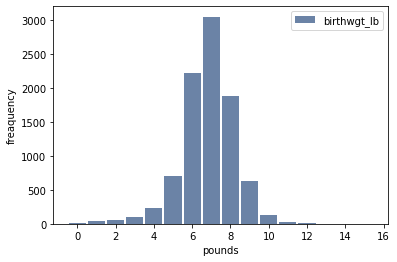

<Figure size 576x432 with 0 Axes>

In [11]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.show(xlabel= 'pounds', ylabel='freaquency')

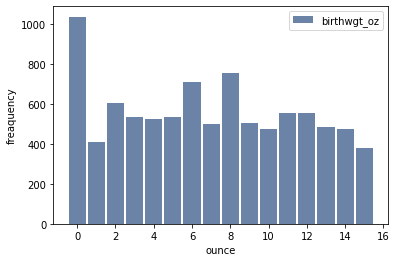

<Figure size 576x432 with 0 Axes>

In [12]:
hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.show(xlabel= 'ounce', ylabel='freaquency')

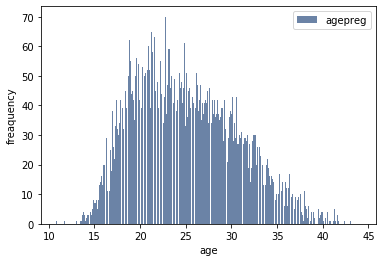

<Figure size 576x432 with 0 Axes>

In [13]:
hist = thinkstats2.Hist(live.agepreg, label='agepreg')
thinkplot.Hist(hist)
thinkplot.show(xlabel= 'age', ylabel='freaquency')

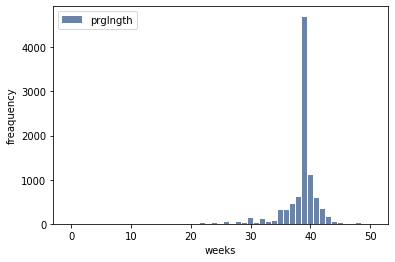

<Figure size 576x432 with 0 Axes>

In [14]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.show(xlabel= 'weeks', ylabel='freaquency')

In [15]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [16]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


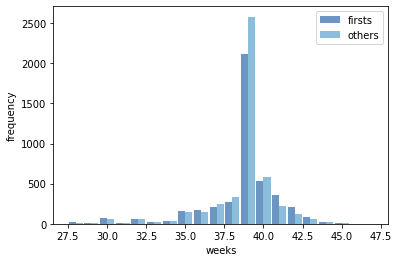

<Figure size 576x432 with 0 Axes>

In [17]:
import numpy as np
interim = live.copy()
interim.loc[interim.prglngth <= 27] = np.nan
interim.loc[interim.prglngth > 47] = np.nan
firsts = interim[interim.birthord == 1]
others = interim[interim.birthord != 1]
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width, label='firsts')
thinkplot.Hist(other_hist, align='left', width=width, label='others')
thinkplot.Show(xlabel='weeks', ylabel='frequency')

In [18]:
import pandas as pd 
df = pd.DataFrame([[firsts.prglngth.mean(), others.prglngth.mean()], 
                  [firsts.prglngth.var(), others.prglngth.var()],
                  [firsts.prglngth.std(), others.prglngth.std()]])
df.index = ["mean", "var", "std"]
df.columns = ["firsts", "others"]
df


,firsts,others
mean,38.706648,38.640009
var,5.950945,4.575583
std,2.439456,2.139061


In [19]:
import math

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [20]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.02912942339148993

In [21]:
CohenEffectSize(firsts.birthwgt_lb, others.birthwgt_lb)

-0.11031978692399831

In [22]:
CohenEffectSize(firsts.agepreg, others.agepreg)

-0.6813376043044352